In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests
from matplotlib.pyplot import figure
from sklearn.metrics import r2_score 

In [2]:
folder = "/Users/edwardamoah/Downloads/Photos-001"

In [3]:
files = os.listdir(folder)

In [4]:
measurements = [file for file in files if len(file.split("_")) > 4]

In [5]:
tree_id = [file.split("_")[3] for file in measurements]
tree_measurements = [file.split("_")[4] for file in measurements]

In [6]:
trees = pd.DataFrame({"tree_id": tree_id, "tree_measurements": tree_measurements, })

In [10]:
trees.sort_values(by=["tree_id"], inplace=True)

In [ ]:
########## pictures measurements ##########

In [16]:
images = [file for file in files if len(file.split("_")) == 4]

In [18]:
# functions to get dbh estimation for an image. The dbh estimation algorithm FastAPI must be running locally. 

def getDBH(temp_image, measured_dbh):
    try:

        url = f'http://127.0.0.1:8000/recognize/{measured_dbh}'

        file = {'uploaded_file': open(temp_image, 'rb')}

        r = requests.post(url, files=file)

        dbh = eval(r.text)['dbh']

        return dbh
        
    except:
        return None

In [21]:
filepaths = [os.path.join(folder, file) for file in images]

In [22]:
df = pd.DataFrame({
    "images": images,
    "filepaths": filepaths,
})

In [24]:
def getMeasuredDBH(image):
    id = image.split("_")[-1].split(".")[0]
    return trees[trees["tree_id"] == id]["tree_measurements"].values[0]

In [25]:
df["measured_dbh"] = df["images"].apply(getMeasuredDBH)

In [27]:
df['predicted_dbh'] = df.apply(lambda x: getDBH(x['filepaths'], x['measured_dbh']), axis=1)

In [29]:
def convertCircleToDiameter(circle):
    return circle / np.pi

In [36]:
df['measured_dbh'] = df['measured_dbh'].astype(float)

In [37]:
df['measured_dbh'] = df['measured_dbh'].apply(convertCircleToDiameter)

In [43]:
df = df[df['predicted_dbh'] < 200] ##

In [44]:
from sklearn.metrics import mean_squared_error
import numpy as np
actual = df['measured_dbh']
predicted = df['predicted_dbh']
rmse = np.sqrt(mean_squared_error(actual, predicted))
rmse


3.8428816416116467

Text(2, 30, 'RMSE = 3.84 ')

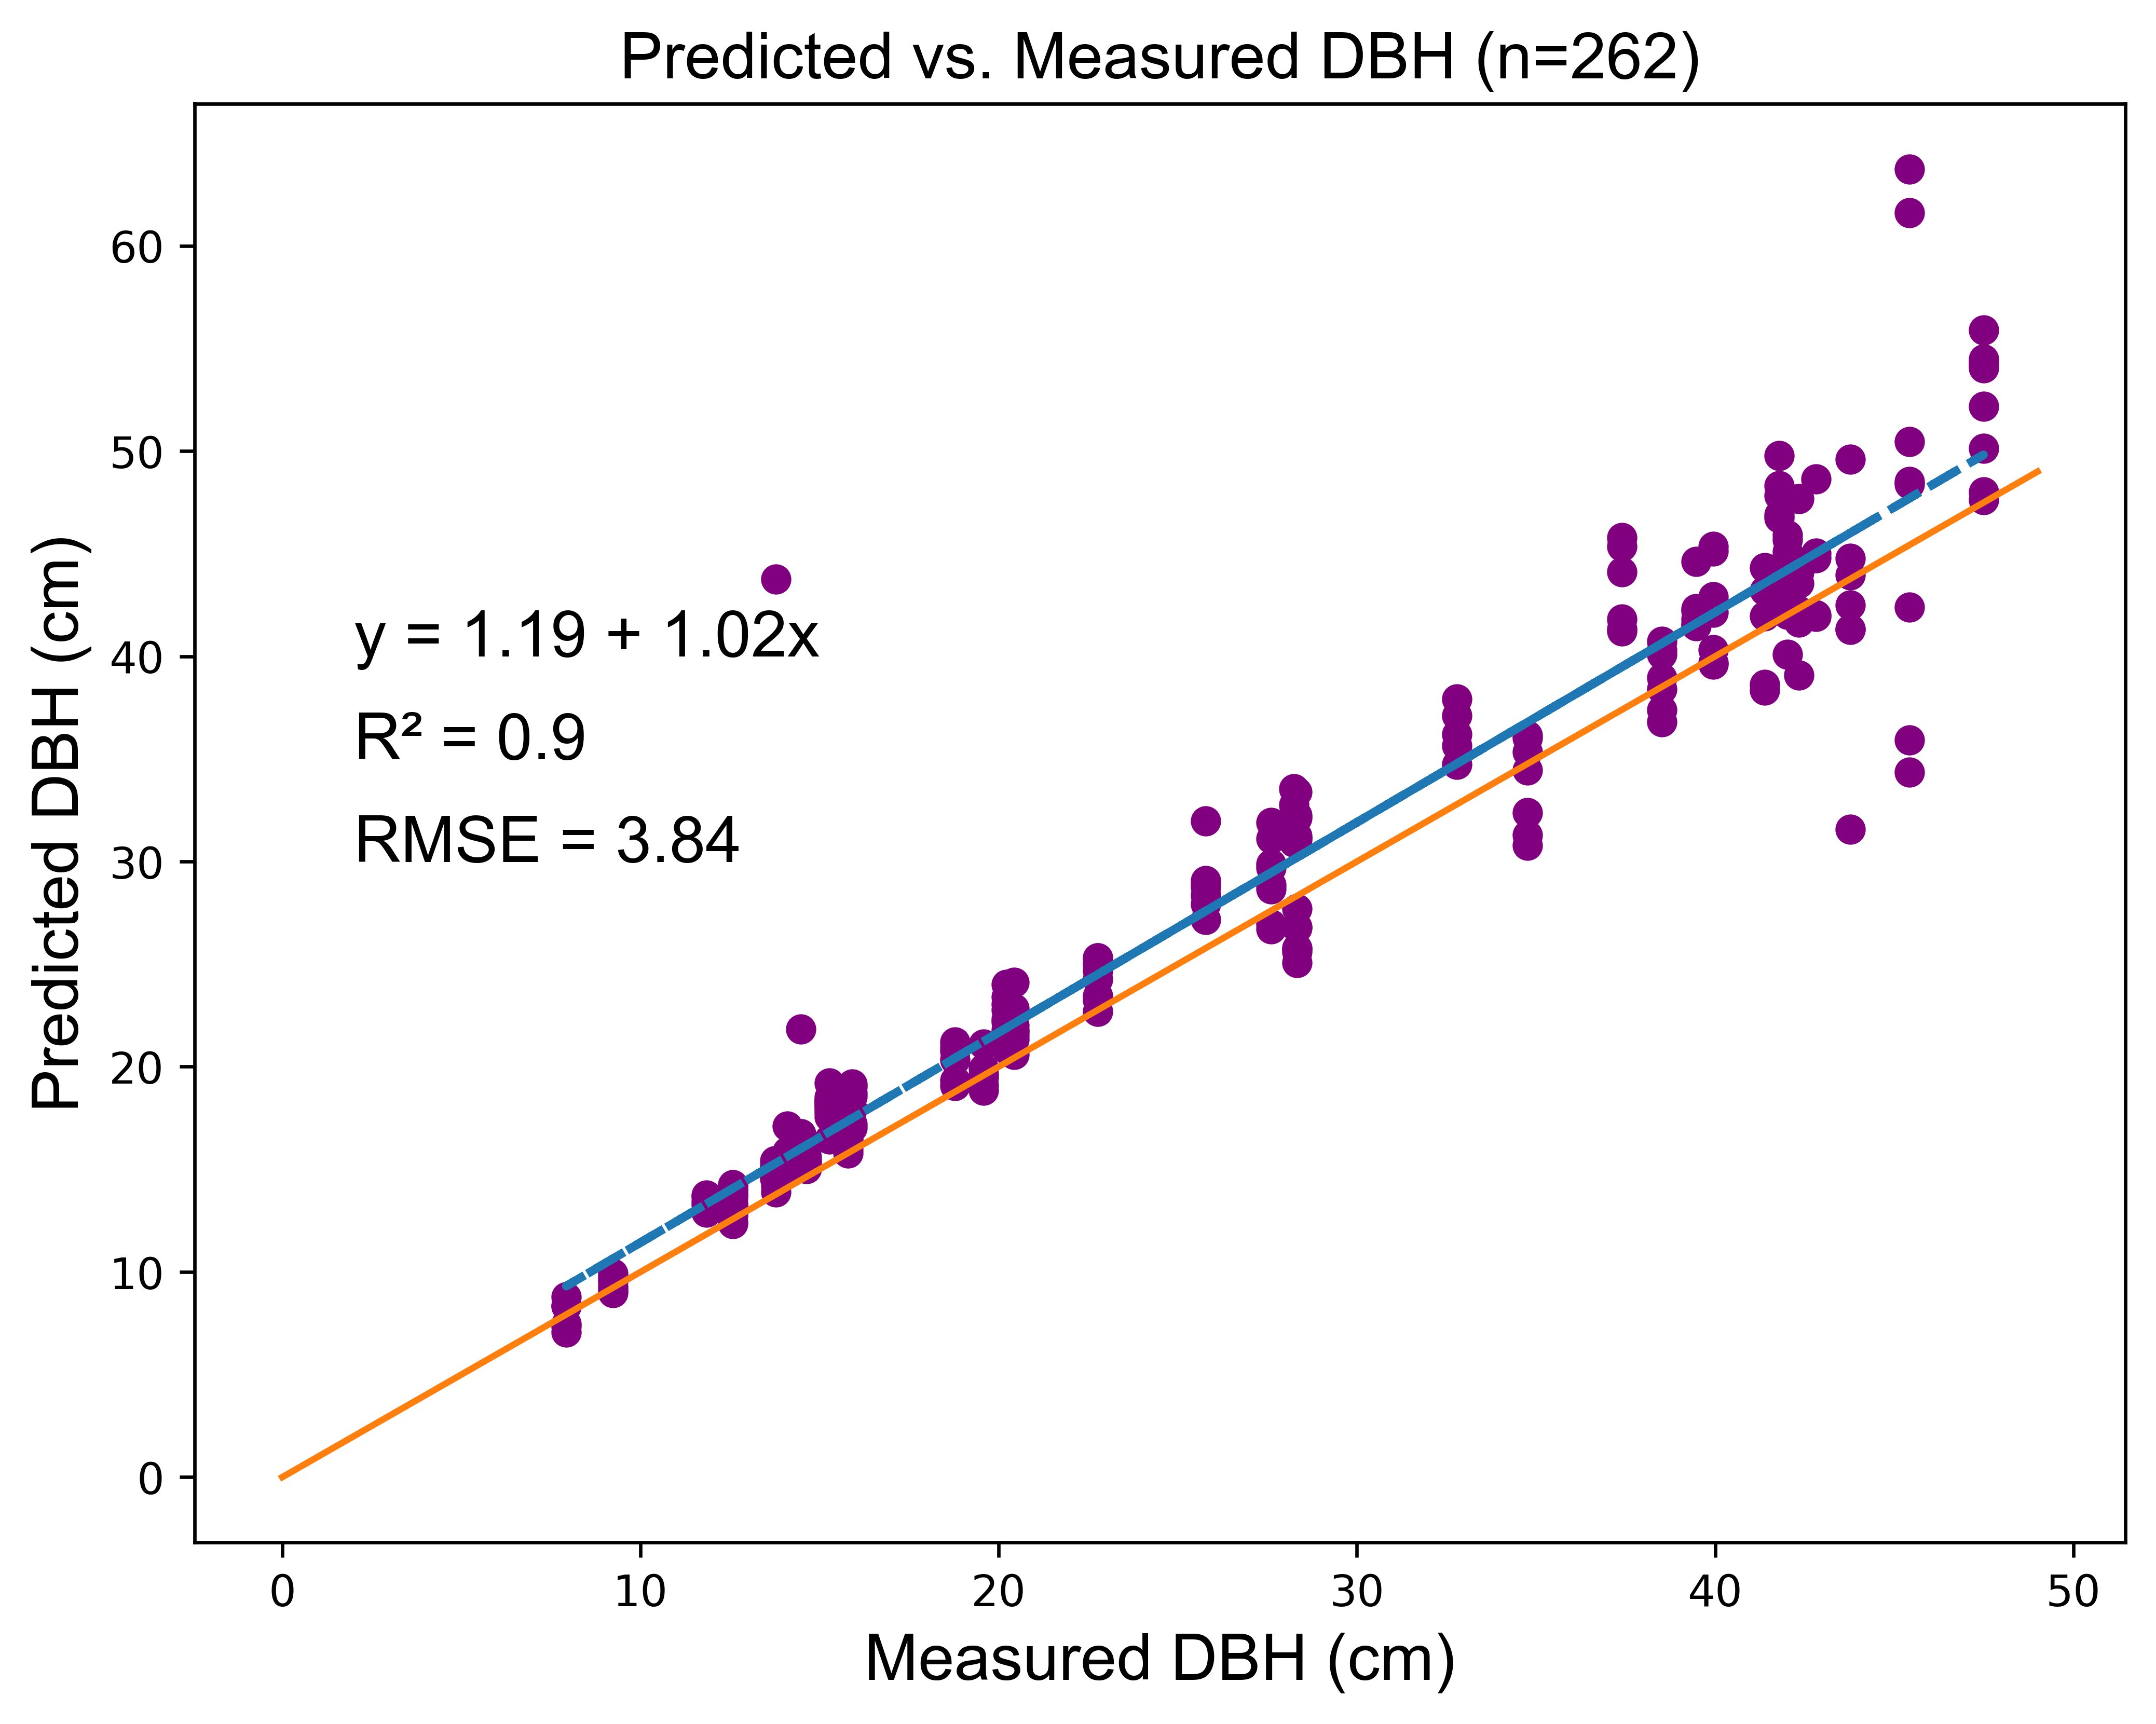

In [95]:
# make residual plot for the corelation between predicted and measure dbh values
x = np.array(df['measured_dbh']); y = np.array( [ float(x) for x in df['predicted_dbh']])
a, b = np.polyfit(x, y , 1)

figure(figsize=(8, 6), dpi=600)

# font 
font = {'fontname':'Arial'}


plt.scatter(x, y, color='purple')
plt.plot(x, a*x+b, linestyle='--', linewidth=2)
plt.plot(np.arange(50), np.arange(50))
plt.xlabel("Measured DBH (cm)", **font, size=15)
plt.ylabel("Predicted DBH (cm)", **font, size=15)
plt.title(f"Predicted vs. Measured DBH (n={len(df)})", **font, size=15)

# add fitted regression equation to plot
plt.text(2, 40, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=15, **font)

# add the r2
plt.text(2,35, f"R\u00b2 = {round(r2_score(x,y),2)} ", size=15, **font)

# add rmse
plt.text(2,30, f"RMSE = {round(rmse,2)} ", size=15, **font)

In [47]:
df['diff'] = df['predicted_dbh'] - df['measured_dbh']

/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_44117/2668415990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'] = df['predicted_dbh'] - df['measured_dbh']


In [50]:
df['tree_id'] = df['images'].apply(lambda x: x.split("_")[-1].split(".")[0])

/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_44117/2413434890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tree_id'] = df['images'].apply(lambda x: x.split("_")[-1].split(".")[0])


In [59]:
df1 = df[['diff','tree_id']].groupby('tree_id', as_index=False).mean()

<Axes: xlabel='diff', ylabel='Count'>

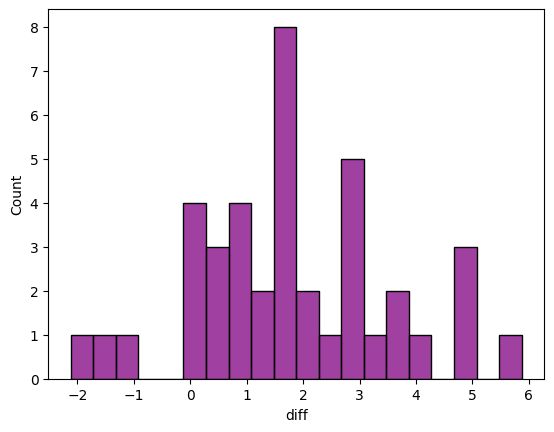

In [60]:
sns.histplot(df1['diff'], bins=20, color='purple')

<Axes: ylabel='diff'>

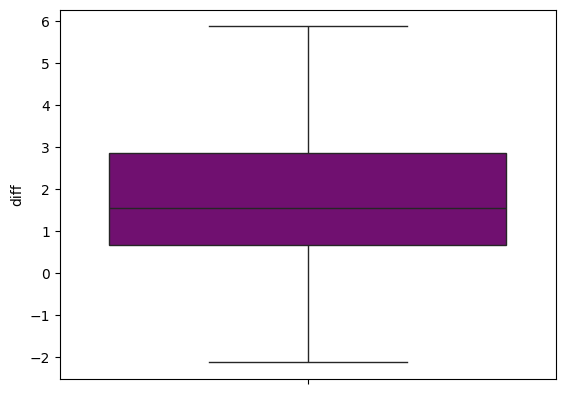

In [61]:
sns.boxplot(df1['diff'], color='purple')

In [67]:
df[['predicted_dbh','tree_id']].groupby('tree_id', as_index=False).mean()

,tree_id,predicted_dbh
0,T1,43.043333
1,T10,32.185714
2,T11,31.870000
3,T12,13.665714
4,T13,48.171250
5,T14,15.651429
6,T15,26.210000
7,T16,44.484000
8,T17,16.611667
9,T18,13.177500


In [70]:
df1 = df[['predicted_dbh','tree_id']].groupby('tree_id', as_index=False).std().merge(df[['predicted_dbh','tree_id']].groupby('tree_id', as_index=False).mean(), on='tree_id')

In [72]:
df1['precision'] = (df1['predicted_dbh_x'] / df1['predicted_dbh_y'])*100

In [77]:
np.mean(df1['precision'])

6.683298531363702

(0.0, 15.0)

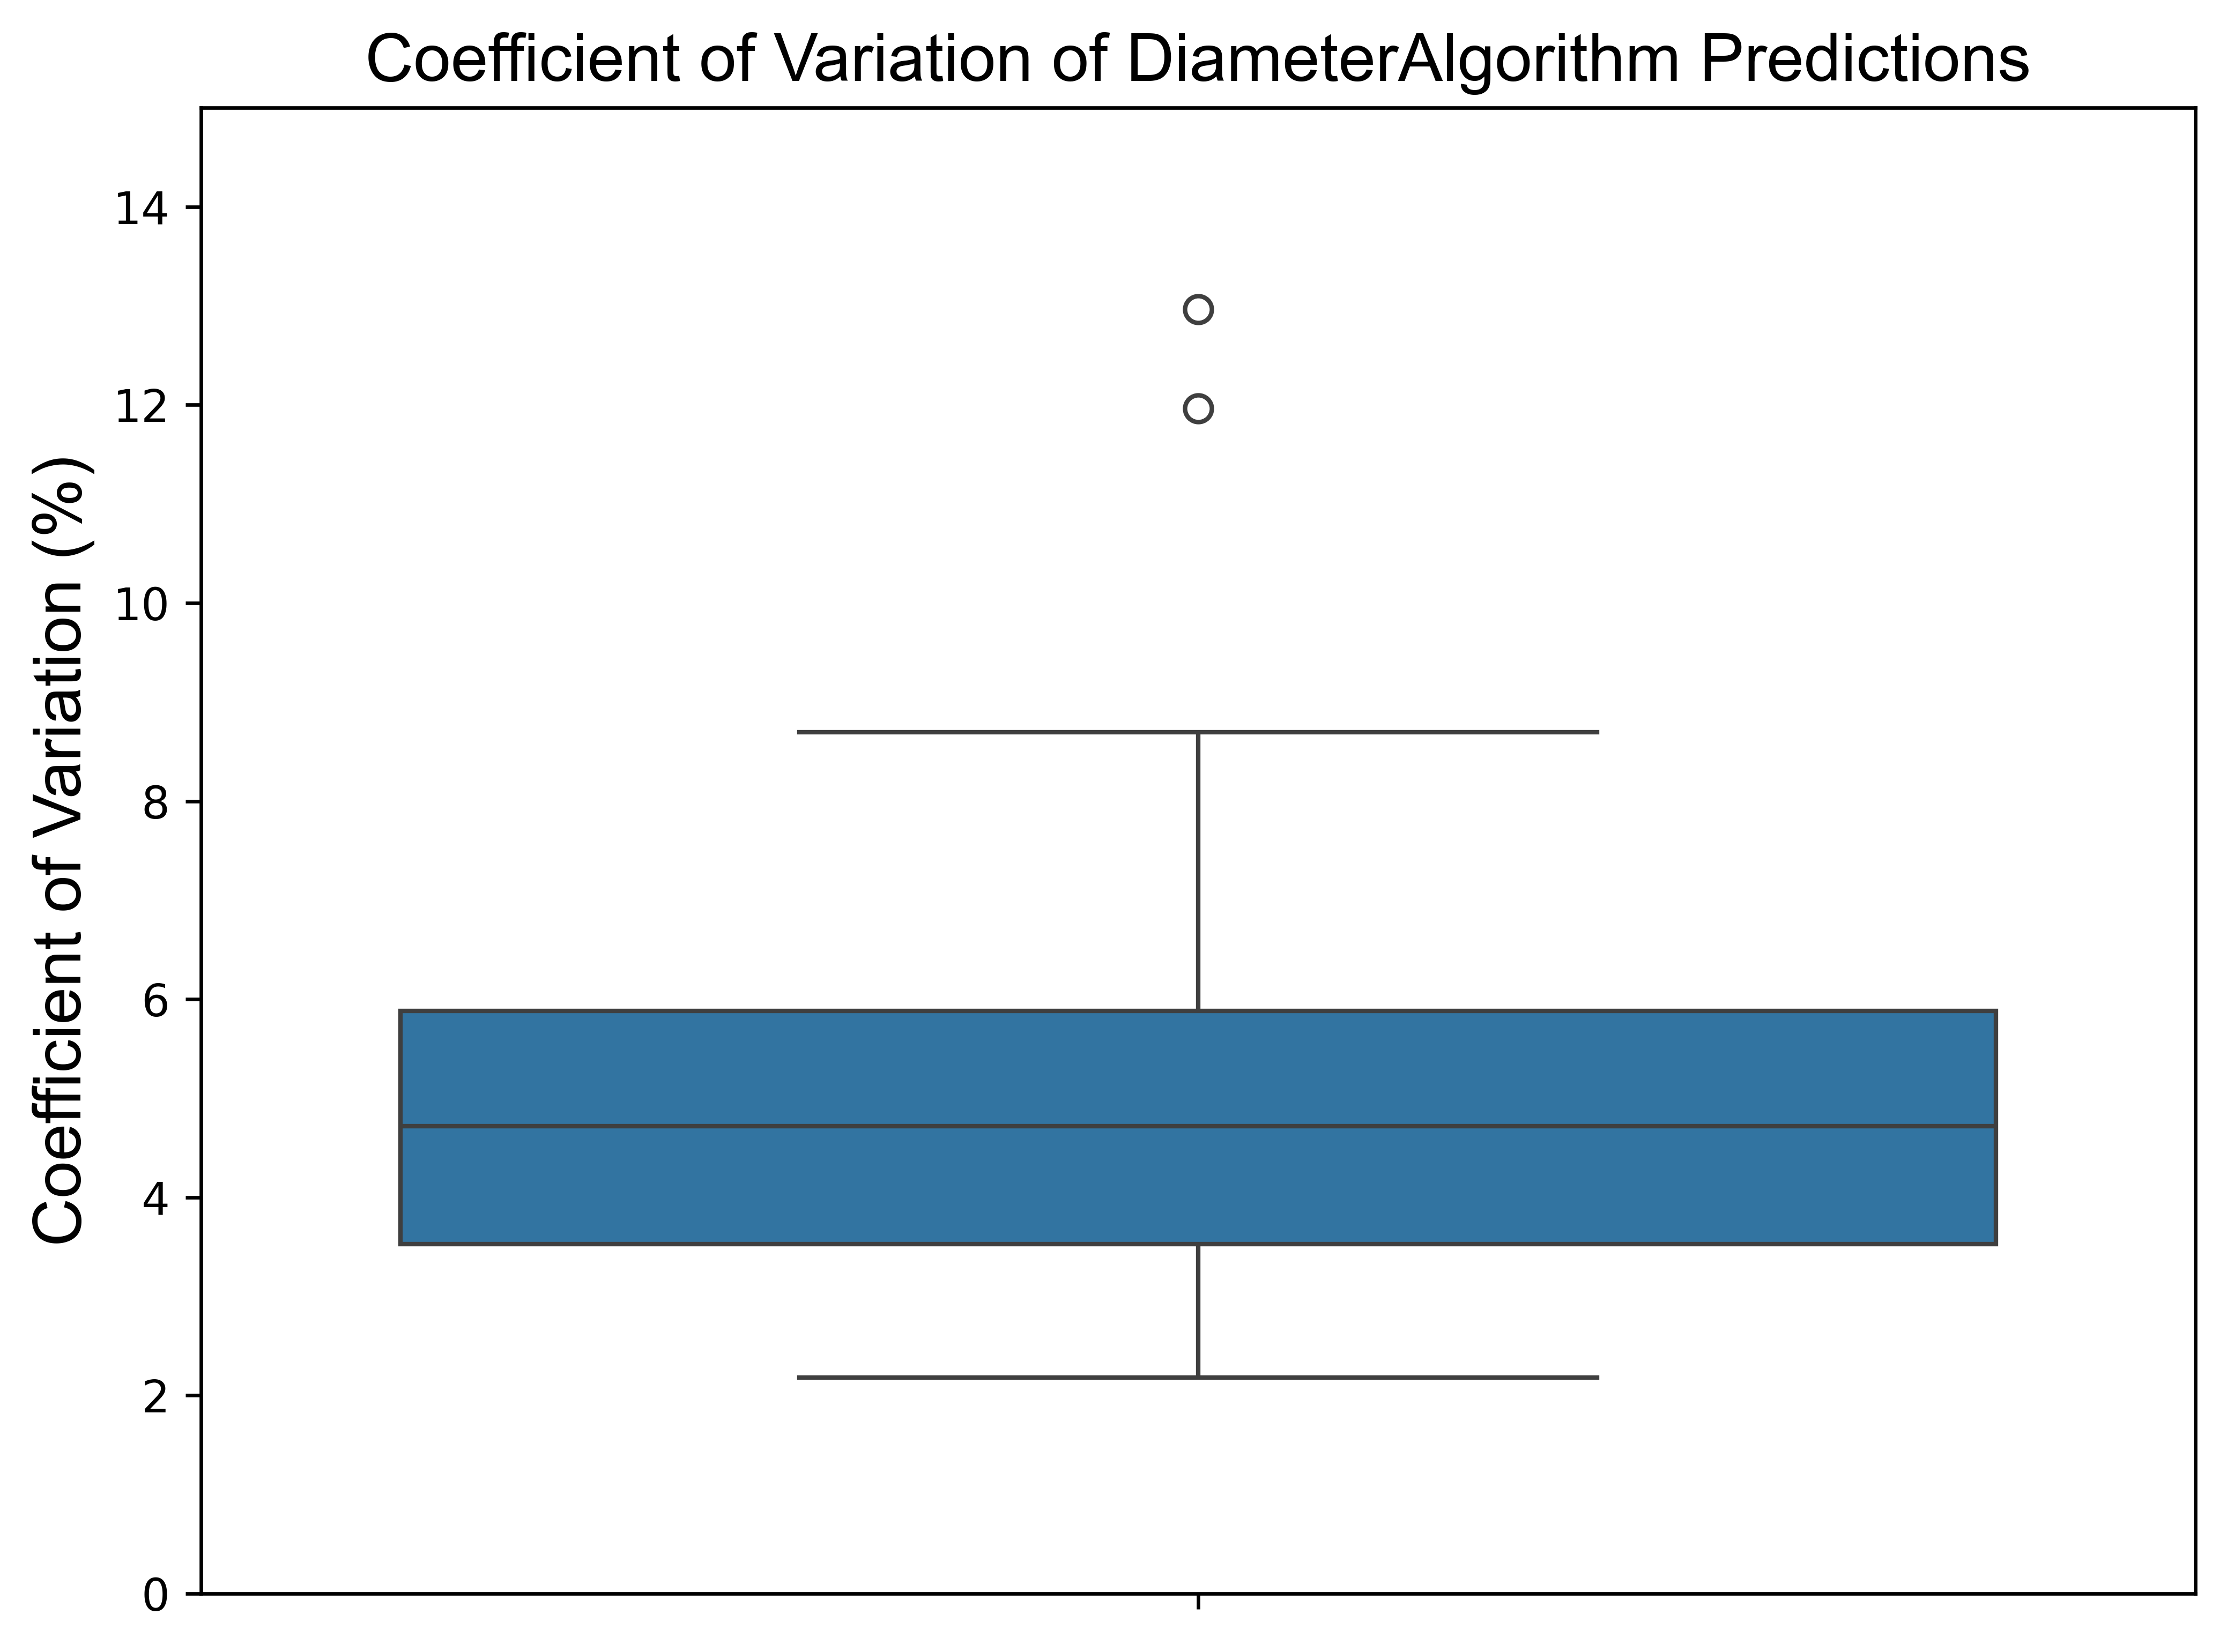

In [116]:
# Calculate the lower and upper bounds
q1 = df1['precision'].quantile(0.25)
q3 = df1['precision'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

figure(figsize=(8, 6), dpi=600)

# Filter the data based on the bounds
filtered_data = df1#[(df1['precision'] >= lower_bound) & (df1['precision'] <= upper_bound)]

# Plot the boxplot with outliers removed
sns.boxplot(filtered_data['precision'])# color='blue')

plt.ylabel("Coefficient of Variation (%)", **font, size=15)
plt.title("Coefficient of Variation of DiameterAlgorithm Predictions", **font, size=15)
plt.ylim(0, 15)


In [112]:
np.mean(filtered_data['precision'])

4.486311837427281

In [83]:
np.mean(df.groupby('tree_id').count().sort_values(by='images', ascending=False)['diff'])

6.55

In [92]:
len(df[df['predicted_dbh'] < 50])

252

,images,filepaths,measured_dbh,predicted_dbh,diff,tree_id
0,PXL_20231202_185814792_T5.jpg,/Users/edwardamoah/Downloads/Photos-001/PXL_20...,43.767609,31.56,-12.207609,T5
1,PXL_20231202_194702902_T30.jpg,/Users/edwardamoah/Downloads/Photos-001/PXL_20...,9.230987,9.54,0.309013,T30
2,PXL_20231202_195520678_T34.jpg,/Users/edwardamoah/Downloads/Photos-001/PXL_20...,15.788170,15.99,0.201830,T34
3,PXL_20231202_191746309_T14.jpg,/Users/edwardamoah/Downloads/Photos-001/PXL_20...,14.101128,15.86,1.758872,T14
4,PXL_20231202_192100210_T16.jpg,/Users/edwardamoah/Downloads/Photos-001/PXL_20...,42.812680,44.80,1.987320,T16
...,...,...,...,...,...,...
259,PXL_20231202_194855256_T31.jpg,/Users/edwardamoah/Downloads/Photos-001/PXL_20...,13.782818,14.93,1.147182,T31
260,PXL_20231202_190255090_T7.jpg,/Users/edwardamoah/Downloads/Photos-001/PXL_20...,39.470426,41.80,2.329574,T7
261,PXL_20231202_184453915_T2.jpg,/Users/edwardamoah/Downloads/Photos-001/PXL_20...,15.278875,19.21,3.931125,T2
262,PXL_20231202_191729943_T14.jpg,/Users/edwardamoah/Downloads/Photos-001/PXL_20...,14.101128,15.24,1.138872,T14


In [96]:
df['measured_dbh']

,images,filepaths,measured_dbh,predicted_dbh,diff,tree_id
0,PXL_20231202_185814792_T5.jpg,/Users/edwardamoah/Downloads/Photos-001/PXL_20...,43.767609,31.56,-12.207609,T5
1,PXL_20231202_194702902_T30.jpg,/Users/edwardamoah/Downloads/Photos-001/PXL_20...,9.230987,9.54,0.309013,T30
2,PXL_20231202_195520678_T34.jpg,/Users/edwardamoah/Downloads/Photos-001/PXL_20...,15.788170,15.99,0.201830,T34
3,PXL_20231202_191746309_T14.jpg,/Users/edwardamoah/Downloads/Photos-001/PXL_20...,14.101128,15.86,1.758872,T14
4,PXL_20231202_192100210_T16.jpg,/Users/edwardamoah/Downloads/Photos-001/PXL_20...,42.812680,44.80,1.987320,T16
...,...,...,...,...,...,...
259,PXL_20231202_194855256_T31.jpg,/Users/edwardamoah/Downloads/Photos-001/PXL_20...,13.782818,14.93,1.147182,T31
260,PXL_20231202_190255090_T7.jpg,/Users/edwardamoah/Downloads/Photos-001/PXL_20...,39.470426,41.80,2.329574,T7
261,PXL_20231202_184453915_T2.jpg,/Users/edwardamoah/Downloads/Photos-001/PXL_20...,15.278875,19.21,3.931125,T2
262,PXL_20231202_191729943_T14.jpg,/Users/edwardamoah/Downloads/Photos-001/PXL_20...,14.101128,15.24,1.138872,T14


In [99]:
df['predicted_dbh'] = df.apply(lambda x: getDBH(x['filepaths'], round(x['measured_dbh'],2) ), axis=1)

/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_44117/3655218220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['predicted_dbh'] = df.apply(lambda x: getDBH(x['filepaths'], round(x['measured_dbh'],2) ), axis=1)


In [100]:
df

,images,filepaths,measured_dbh,predicted_dbh,diff,tree_id
0,PXL_20231202_185814792_T5.jpg,/Users/edwardamoah/Downloads/Photos-001/PXL_20...,43.767609,31.56,-12.207609,T5
1,PXL_20231202_194702902_T30.jpg,/Users/edwardamoah/Downloads/Photos-001/PXL_20...,9.230987,9.54,0.309013,T30
2,PXL_20231202_195520678_T34.jpg,/Users/edwardamoah/Downloads/Photos-001/PXL_20...,15.788170,15.99,0.201830,T34
3,PXL_20231202_191746309_T14.jpg,/Users/edwardamoah/Downloads/Photos-001/PXL_20...,14.101128,15.86,1.758872,T14
4,PXL_20231202_192100210_T16.jpg,/Users/edwardamoah/Downloads/Photos-001/PXL_20...,42.812680,44.80,1.987320,T16
...,...,...,...,...,...,...
259,PXL_20231202_194855256_T31.jpg,/Users/edwardamoah/Downloads/Photos-001/PXL_20...,13.782818,14.93,1.147182,T31
260,PXL_20231202_190255090_T7.jpg,/Users/edwardamoah/Downloads/Photos-001/PXL_20...,39.470426,41.80,2.329574,T7
261,PXL_20231202_184453915_T2.jpg,/Users/edwardamoah/Downloads/Photos-001/PXL_20...,15.278875,19.21,3.931125,T2
262,PXL_20231202_191729943_T14.jpg,/Users/edwardamoah/Downloads/Photos-001/PXL_20...,14.101128,15.24,1.138872,T14
